## Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('titanic.csv')

## Data exploration

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


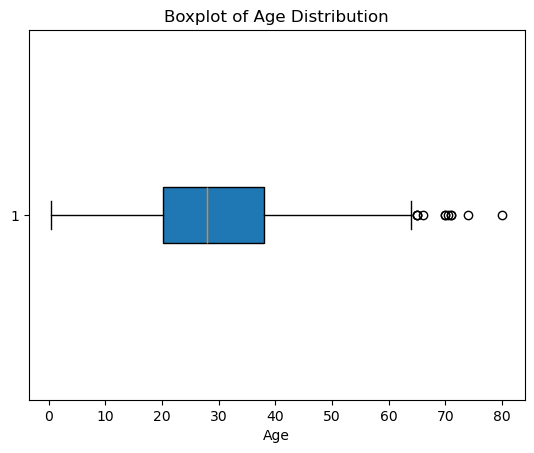

In [11]:
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True)

plt.title('Boxplot of Age Distribution')
plt.xlabel('Age')

plt.show()

In [12]:
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
mode_embarked = df['Embarked'].mode()[0]

df['Embarked'].fillna(mode_embarked, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_23516\3077235822.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### DATA ANALYSIS

In [16]:
no_of_passengers = df.groupby("Survived").size()

In [17]:
no_of_passengers

Survived
0    549
1    342
dtype: int64

In [18]:
number_of_survivors=no_of_passengers[1]
number_of_survivors

342

In [19]:
No_of_deaths=no_of_passengers[0]
No_of_deaths

549

In [20]:
percent_of_survivors = (number_of_survivors/(number_of_survivors+No_of_deaths))*100
percent_of_deaths = (No_of_deaths/(No_of_deaths+number_of_survivors))*100


In [21]:
percent_of_survivors

38.38383838383838

In [22]:
percent_of_deaths

61.61616161616161

### BAR PLOT FOR SURVIVORS VS DEATHS

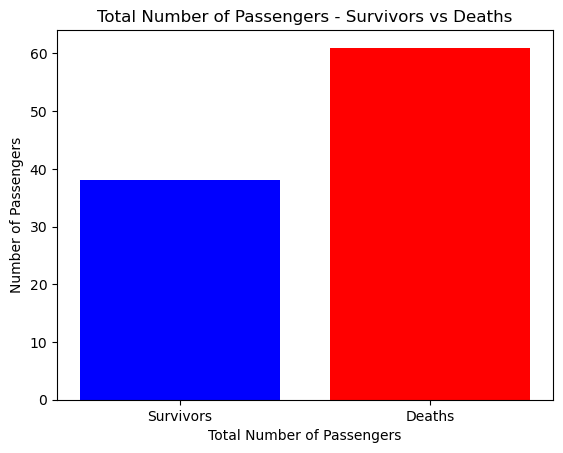

In [24]:
objects = ['Survivors','Deaths']
data = [38,61]

plt.bar(objects,data,color=['blue','red'])

plt.ylabel('Number of Passengers')
plt.xlabel('Total Number of Passengers')
plt.title('Total Number of Passengers - Survivors vs Deaths')

plt.show()

In [25]:
df_survived = df.groupby(['Sex','Survived']).size()
df_survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

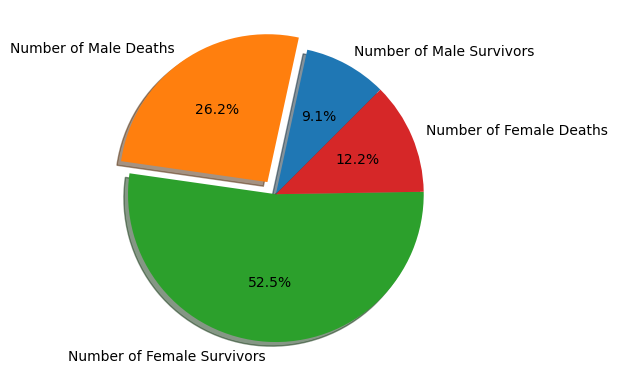

In [26]:
labels =['Number of Male Survivors','Number of Male Deaths','Number of Female Survivors','Number of Female Deaths']
color =['Blue','Green','Yellow','Red']
explode=(0, 0.1, 0, 0)

plt.pie(df_survived, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
plt.show()

### AGE OF PASSENGERS 

In [28]:
age_of_passengers = df.groupby("Age").size()

In [29]:
age_of_passengers.head()

Age
0.42    1
0.67    1
0.75    2
0.83    2
0.92    1
dtype: int64

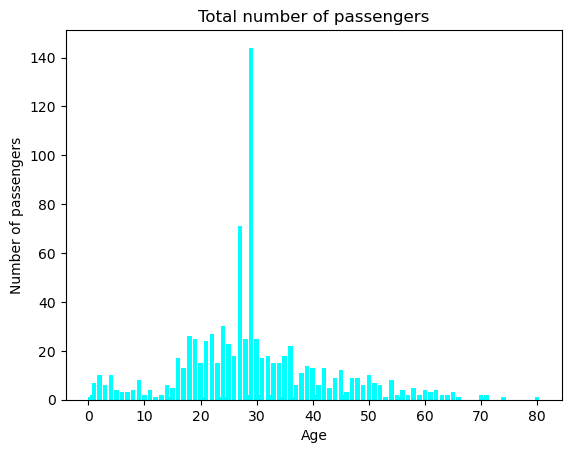

In [30]:
plt.bar(age_of_passengers.index, age_of_passengers.values, color='cyan')

plt.ylabel("Number of passengers")
plt.xlabel("Age")
plt.title("Total number of passengers")
plt.show()

### PASSENGERS TRAVELLING WITH SIBLINGS OR SPOUSES

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
sib_sp = df.groupby("SibSp").size()
sib_sp

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

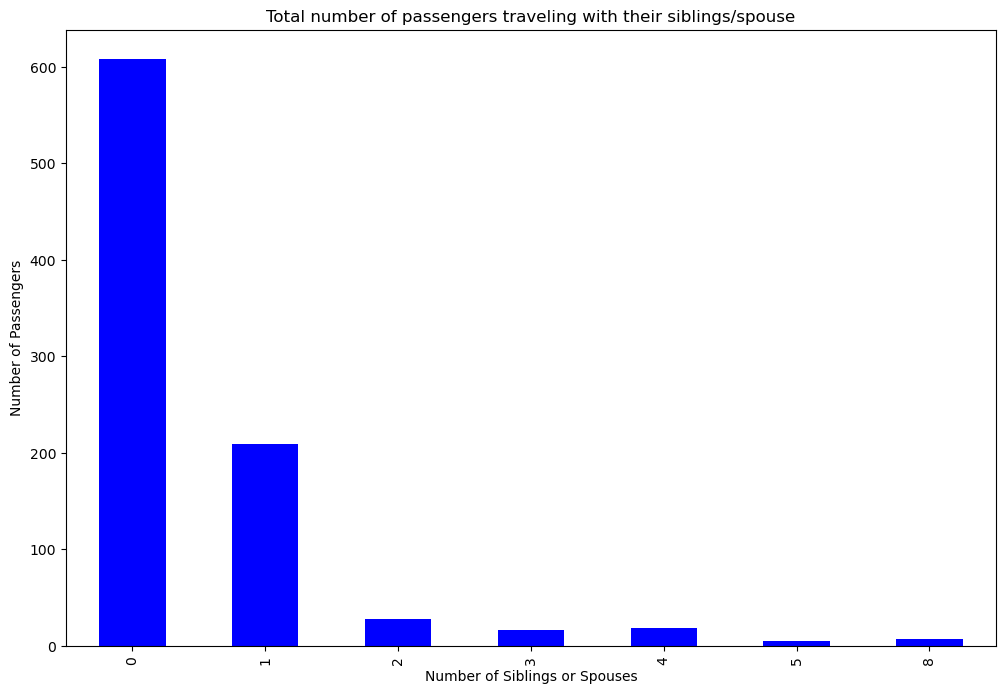

In [34]:

sib_sp.plot(kind = "bar", figsize = (12,8), color = 'blue')



plt.ylabel("Number of Passengers")
plt.xlabel("Number of Siblings or Spouses")
plt.title("Total number of passengers traveling with their siblings/spouse")
plt.show()

### PASSENGERS WITH PARENT OR CHILDREN

In [36]:
parent_children = df.groupby("Parch").size()
parent_children 

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

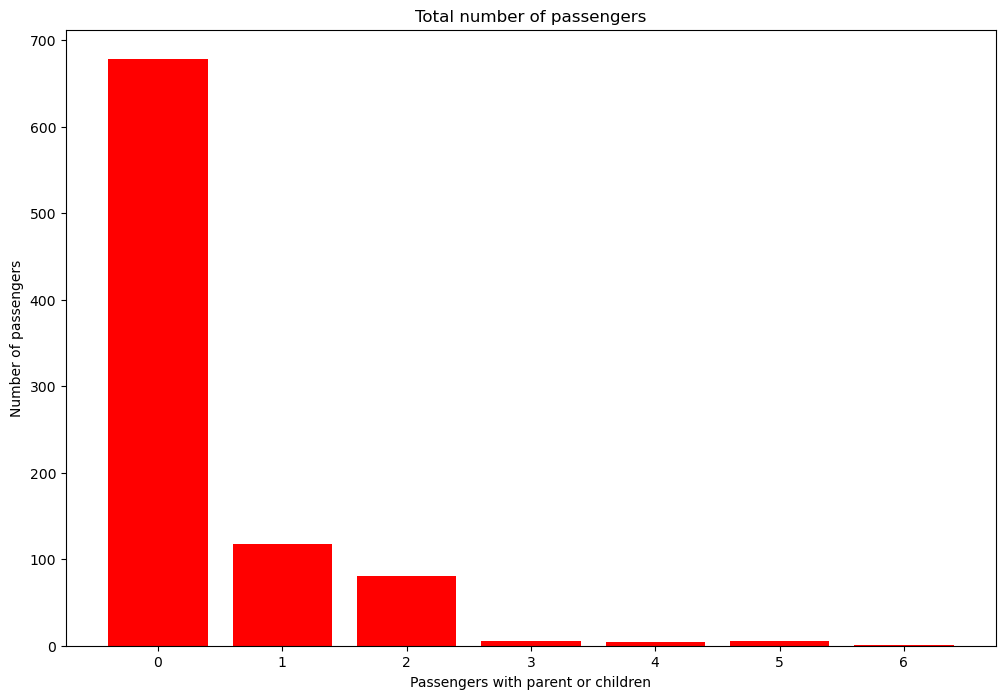

In [37]:
plt.figure(figsize=(12,8))
plt.bar(parent_children.index, parent_children.values, color='red')

plt.ylabel("Number of passengers")
plt.xlabel("Passengers with parent or children")
plt.title("Total number of passengers")
plt.show()

### PASSENGERS SURVIVAL BASED ON PCLASS

In [39]:
pclass = df.groupby("Pclass").size()
pclass

Pclass
1    216
2    184
3    491
dtype: int64

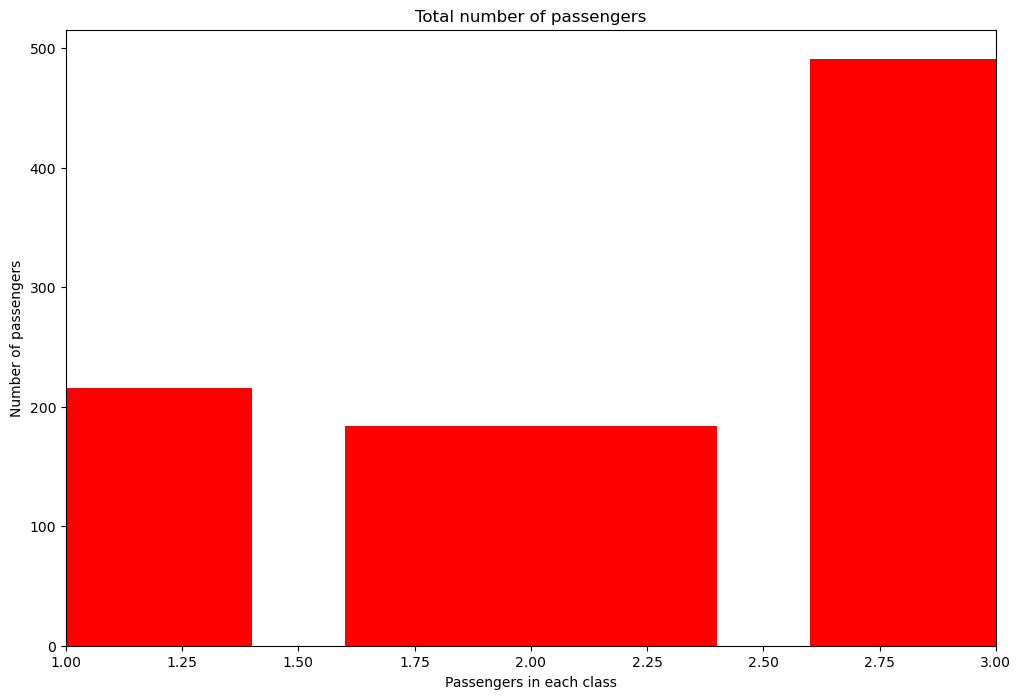

In [40]:
plt.figure(figsize=(12,8))

plt.bar(pclass.index, pclass.values, color='red')
plt.xlim(1,3)
plt.ylabel("Number of passengers")
plt.xlabel("Passengers in each class")
plt.title("Total number of passengers")
plt.show()



In [41]:
class_survived = df.groupby(["Pclass","Survived"]).size()
class_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

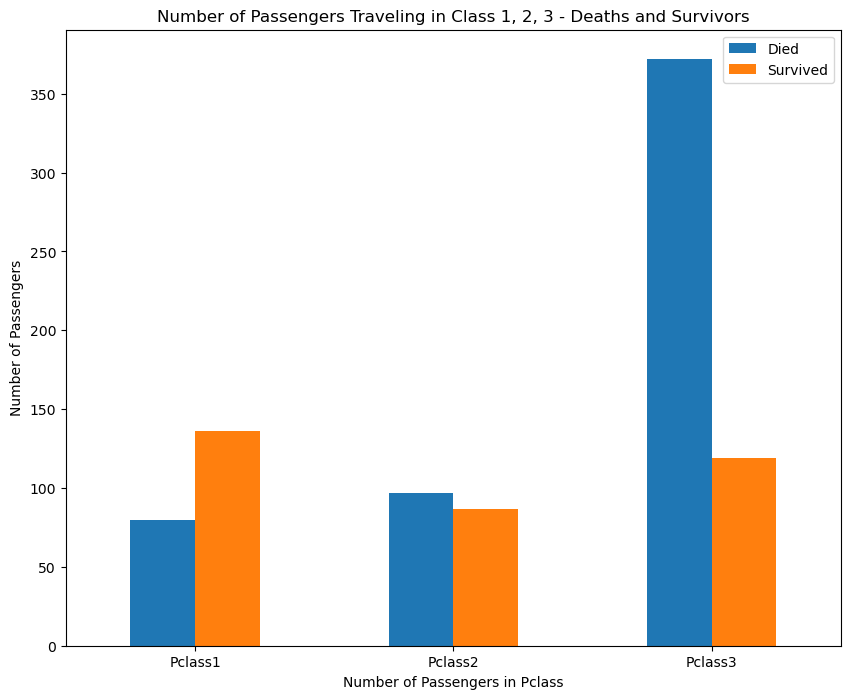

In [42]:
import numpy as np

objects = ('Pclass1','Pclass2','Pclass3')
bars = np.arange(len(objects))

class_survived.unstack().plot(kind = "bar", figsize = (10,8))

plt.xticks(bars, objects, rotation='horizontal')

plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Pclass")

plt.title("Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors")
plt.legend(['Died', 'Survived'])
plt.show()

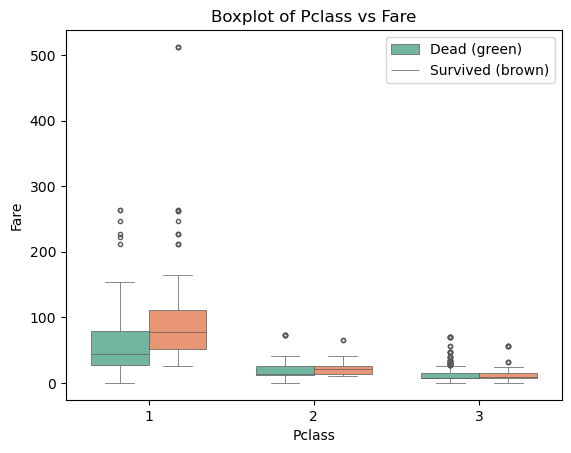

In [43]:
import seaborn as sns
sns.boxplot(x = "Pclass", y = "Fare", hue = "Survived", data = df, palette = "Set2", width = 0.7, fliersize = 3, whis = 1.5, linewidth = 0.5)
plt.title("Boxplot of Pclass vs Fare")
plt.legend(["Dead (green)", "Survived (brown)"])
plt.show()

### DATA OF SURVIVORS BASED ON THEIR EMBARKMENT

In [45]:
embark = df.groupby("Embarked").size()
embark

Embarked
C    168
Q     77
S    646
dtype: int64

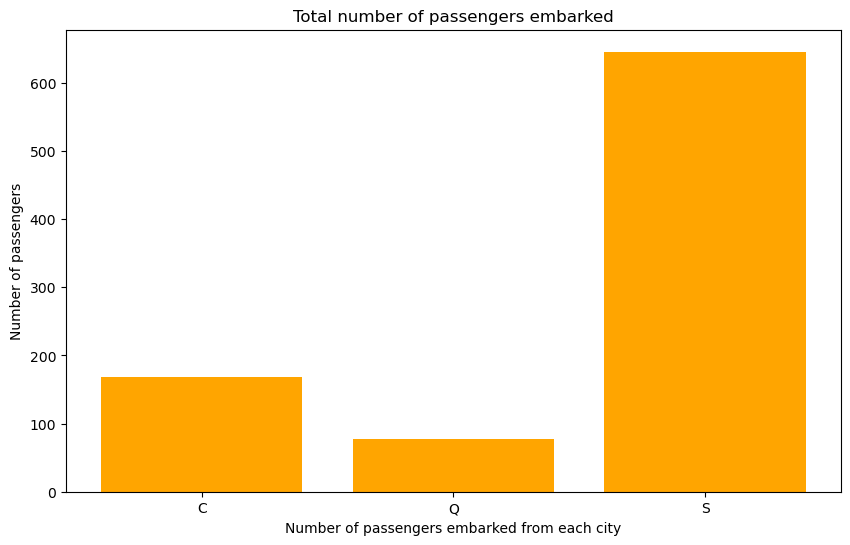

In [46]:
plt.figure(figsize=(10,6))
plt.bar(embark.index, embark.values, color = 'Orange' )

plt.ylabel("Number of passengers")
plt.xlabel("Number of passengers embarked from each city")
plt.title("Total number of passengers embarked")
plt.show()

In [47]:
embark1 = df.groupby(["Embarked","Survived"]).size()
embark1

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

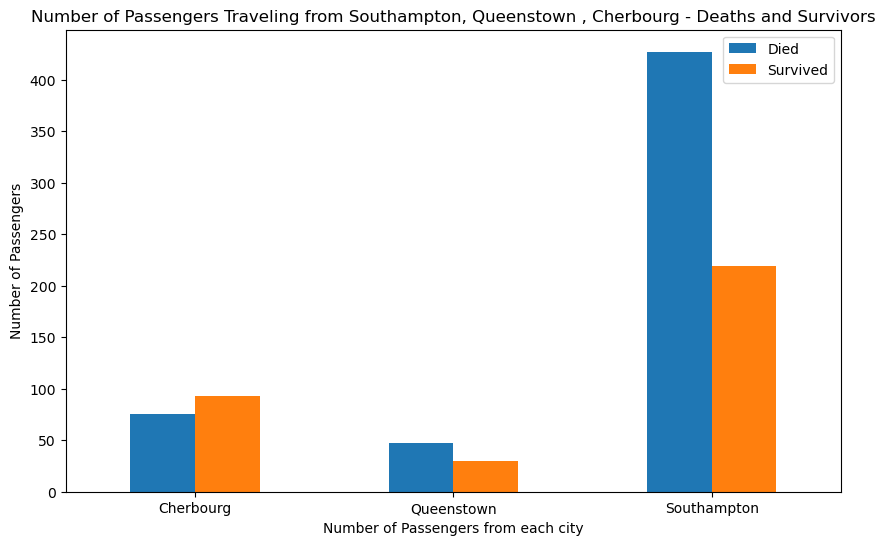

In [48]:
import numpy as np
cities = ('Cherbourg','Queenstown','Southampton')
bars = np.arange(len(cities))

embark1.unstack().plot(kind = "bar", figsize=(10,6))
plt.xticks(bars, cities, rotation='horizontal')

plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers from each city")

plt.title("Number of Passengers Traveling from Southampton, Queenstown , Cherbourg - Deaths and Survivors")
plt.legend(['Died', 'Survived'])
plt.show()

### LOGISTIC REGRESSION 

In [50]:
#Convert categorical variables into Dummy variables

# Machine Learning models typically work with numerical data

# ONE HOT ENCODING - get dummies is function for one hot encoding

sex = pd.get_dummies(df['Sex'],drop_first=True,dtype=np.uint8)

embark = pd.get_dummies(df['Embarked'],drop_first=True,dtype=np.uint8)

pclass = pd.get_dummies(df["Pclass"],drop_first=True,dtype=np.uint8)
pclass


,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [51]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [52]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [53]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)
df

,Survived,Age,SibSp,Parch,Fare,Cabin
0,0,22.0,1,0,7.2500,NaN
1,1,38.0,1,0,71.2833,C85
2,1,26.0,0,0,7.9250,NaN
3,1,35.0,1,0,53.1000,C123
4,0,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN
887,1,19.0,0,0,30.0000,B42
888,0,27.0,1,2,23.4500,NaN
889,1,26.0,0,0,30.0000,C148


In [54]:
df= pd.concat([df,sex,embark,pclass],axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
0,0,22.0,1,0,7.2500,NaN,1,0,1,0,1
1,1,38.0,1,0,71.2833,C85,0,0,0,0,0
2,1,26.0,0,0,7.9250,NaN,0,0,1,0,1
3,1,35.0,1,0,53.1000,C123,0,0,1,0,0
4,0,35.0,0,0,8.0500,NaN,1,0,1,0,1


In [55]:
X = df.drop(["Survived","Cabin","Fare"],axis=1)
y = df['Survived']

In [56]:
X.columns=X.columns.astype('str')
type(X.columns)

#y.columns=y.columns.astype('str')
#type(y.columns)

pandas.core.indexes.base.Index

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   male    891 non-null    uint8  
 4   Q       891 non-null    uint8  
 5   S       891 non-null    uint8  
 6   2       891 non-null    uint8  
 7   3       891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 25.4 KB


In [58]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 168 to 688
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     623 non-null    int32
 1   SibSp   623 non-null    int32
 2   Parch   623 non-null    int32
 3   male    623 non-null    int32
 4   Q       623 non-null    int32
 5   S       623 non-null    int32
 6   2       623 non-null    int32
 7   3       623 non-null    int32
dtypes: int32(8)
memory usage: 24.3 KB


In [60]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 623 entries, 168 to 688
Series name: Survived
Non-Null Count  Dtype
--------------  -----
623 non-null    int64
dtypes: int64(1)
memory usage: 9.7 KB


In [61]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)
pred=pred.astype('int')
pred

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

### MODEL EVALUATION

In [63]:
# CONFUSION MATRIX - MEASURES THE EFFECTIVENESS OF THE MODEL
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,pred)
conf_mat

array([[143,  19],
       [ 35,  71]], dtype=int64)

In [64]:
#Calculate Precision, Recall and F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.79      0.67      0.72       106

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



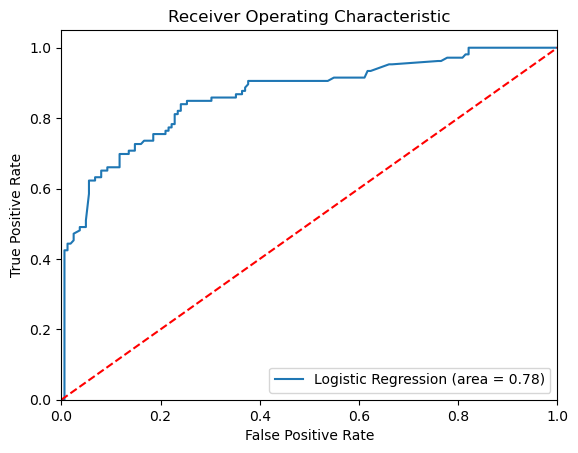

In [65]:
#Generate AUC-ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

### Support Vector Machine

In [66]:
from sklearn.svm import SVC
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
#Enables the model to predict probabilities instead of just class labels
svcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)
svc_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,svc_pred)
conf_mat

array([[138,  24],
       [ 33,  73]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.75      0.69      0.72       106

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



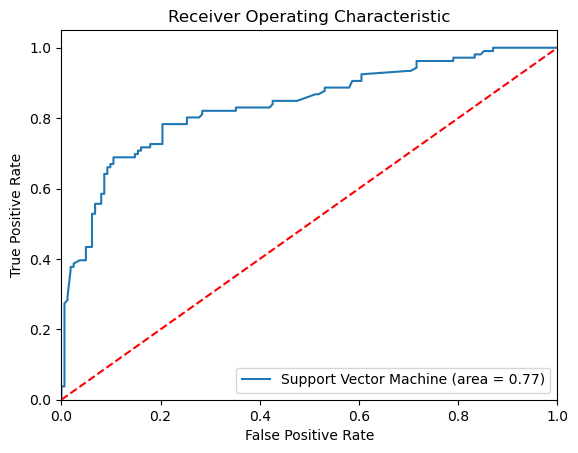

In [69]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc = roc_auc_score(y_test, svcmodel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, svcmodel.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier


knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance

knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
knn_pred = knnmodel.predict(X_test)
knn_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(y_test,knn_pred)
conf_mat1

array([[138,  24],
       [ 42,  64]], dtype=int64)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       162
           1       0.73      0.60      0.66       106

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268



In [74]:
y_test

558    1
547    1
494    0
679    1
7      0
      ..
723    0
108    0
408    0
87     0
463    0
Name: Survived, Length: 268, dtype: int64

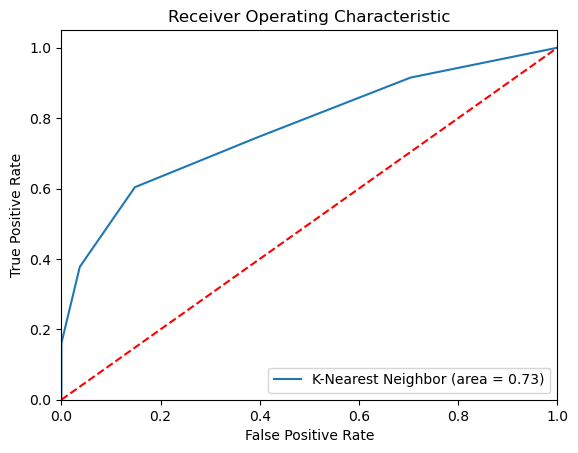

In [76]:
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knnmodel.predict(X_test))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knnmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

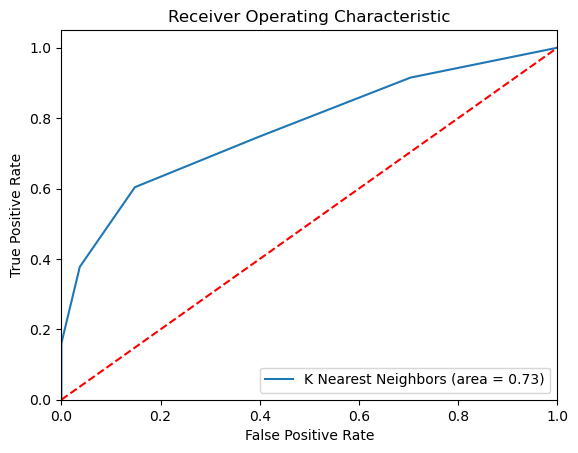

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knnmodel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, knnmodel.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='K Nearest Neighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('KNN_ROC')

plt.show()

## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion="gini",random_state=50)

dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [88]:
dt_pred = dtmodel.predict(X_test)
dt_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat2 = confusion_matrix(y_test,dt_pred)
conf_mat2

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

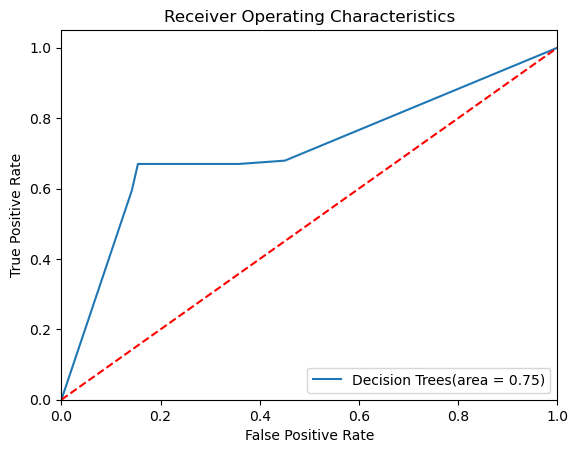

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt_roc_auc = roc_auc_score(y_test, dtmodel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, dtmodel.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Decision Trees(area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")

plt.savefig('DT_ROC')

plt.show()

### RANDOM FOREST

In [ ]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state=0)
rfmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)
rf_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat_dt = confusion_matrix(y_test,rf_pred)
conf_mat_dt

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


rf_roc_auc = roc_auc_score(y_test, rfmodel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, rfmodel.predict_proba(X_test))

plt.figure()

plt.plot(fpr, tpr, label='Random Forest(area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim[(0.0, 1.05)]

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="Lower Right")

plt.savefig('RF_ROC')

plt.show()
